# Reamostragem - Bootstrap

Reamostragem ou Bootstrap é um conceito que significa amostra repetivamente os valores a partir dos dados observados. com o objetivo geral de avaliar a variabilidade aleatória em uma estatística

Média original: 48.96
Intervalo de Confiança de 95%: [47.28, 50.63]


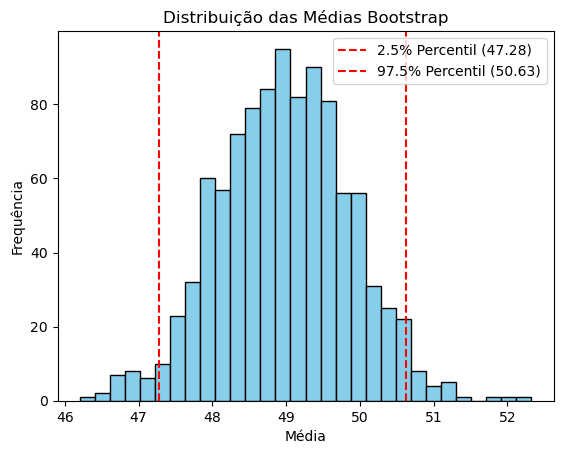

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando uma amostra aleatória
np.random.seed(42)
dados = np.random.normal(loc=50, scale=10, size=100)  # Média 50, desvio padrão 10, tamanho 100

# Função de bootstrap para calcular a média
def bootstrap_mean(data, n_bootstrap=1000):
    boot_means = []
    for _ in range(n_bootstrap):
        # Reamostragem com reposição
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.array(boot_means)

# Realizando o bootstrap
n_bootstrap = 1000
bootstrap_means = bootstrap_mean(dados, n_bootstrap=n_bootstrap)

# Calculando o intervalo de confiança de 95%
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

# Exibindo os resultados
print(f'Média original: {np.mean(dados):.2f}')
print(f'Intervalo de Confiança de 95%: [{ci_lower:.2f}, {ci_upper:.2f}]')

# Plotando a distribuição das médias bootstrap
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'2.5% Percentil ({ci_lower:.2f})')
plt.axvline(ci_upper, color='red', linestyle='--', label=f'97.5% Percentil ({ci_upper:.2f})')
plt.title('Distribuição das Médias Bootstrap')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.legend()
plt.show()
